# WeatherPy

## Observations

### 1. In the temperature vs latitude plot, it appears there is an observable trend of higher temperatures when getting closer to latitude zero, and lower temperatures as the latitudes get further away from zero. It is not linear and there as there are a variety of tempeartures near the equator that are all pretty similar from -20 to +20 latitude.

### 2. The southern hemisphere appears to have a stronger correlation of higher temperature when closer to the equator and lower temps when further away than the northern hemispher. Additionally when looking at the respectve "r" values for the southern and northern hemispheres, the southern "r" value is higher indicating a stronger correlation.

### 3. All humidity, wind speed, and cloudiness have much weaker correlations than temperatures when it comes to separation from the equator. None of those have as close to an observable trend as temperature.

## Dependencies, and random city generation

In [1]:
# Dependencies
import pandas as pd
import requests
import time
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from citipy import citipy

#import API key
from api_keys import weather_api_key

In [2]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

In [4]:
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

631

## Data Collection/API Requests

In [5]:
#create lists and empty DF for entry with data from API request
city_num = []
cities_found = []
temp = []
lat = []
lng = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
cities_df = pd.DataFrame()
cities_df["City #"] = ""
cities_df["City"] = ""
cities_df["Temp"] = ""
cities_df["Latitude"] = ""
cities_df["Longitude"] = ""                       
cities_df["Humidity"] = ""                         
cities_df["Cloudiness"] = ""                         
cities_df["Wind Speed"] = ""   
cities_df["Country"] = ""   
cities_df["Date"] = ""   

In [6]:
# set up query url
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="
city_number = 1

In [7]:
# loop through cities list and put through request/json response to find data
for city in cities:
    url = query_url + city
    response = requests.get(url)
    data = response.json()
    
    # try and except for the lists to fill in - this will create a print log to show which cities have data from the request/response
    try:        
        temp.append(data['main']['temp_max'])
        lat.append(data['coord']['lat'])
        lng.append(data['coord']['lon'])
        humidity.append(data['main']['humidity'])
        cloudiness.append(data['clouds']['all'])
        wind_speed.append(data['wind']['speed'])
        country.append(data['sys']['country'])
        date.append(data['dt'])
        cities_found.append(city)
        print(f"City Record # {city_number} found |  {city}")
        city_num.append(city_number)
        city_number +=1
    # exception for when city is not found
    except:
        print("Record not found")
        city_number = city_number

City Record # 1 found |  castro
City Record # 2 found |  tuatapere
City Record # 3 found |  hermanus
City Record # 4 found |  saldanha
City Record # 5 found |  manokwari
City Record # 6 found |  arraial do cabo
City Record # 7 found |  dikson
City Record # 8 found |  la asuncion
City Record # 9 found |  kalemie
City Record # 10 found |  albany
City Record # 11 found |  bethel
City Record # 12 found |  ushuaia
City Record # 13 found |  kapaa
City Record # 14 found |  brae
City Record # 15 found |  mataura
City Record # 16 found |  clyde river
City Record # 17 found |  guadalupe y calvo
City Record # 18 found |  vaini
City Record # 19 found |  dongsheng
City Record # 20 found |  north platte
City Record # 21 found |  worland
City Record # 22 found |  port lincoln
Record not found
City Record # 23 found |  bredasdorp
City Record # 24 found |  rikitea
City Record # 25 found |  arlit
City Record # 26 found |  liverpool
City Record # 27 found |  jaciara
City Record # 28 found |  busselton
Ci

City Record # 220 found |  atuona
City Record # 221 found |  guatire
City Record # 222 found |  mount gambier
City Record # 223 found |  guerrero negro
City Record # 224 found |  siddipet
Record not found
City Record # 225 found |  la ronge
Record not found
Record not found
City Record # 226 found |  krasnoselkup
City Record # 227 found |  talnakh
City Record # 228 found |  quatre cocos
City Record # 229 found |  san pedro
City Record # 230 found |  pingdu
City Record # 231 found |  fatehpur
City Record # 232 found |  pevek
City Record # 233 found |  qiongshan
City Record # 234 found |  selma
City Record # 235 found |  mosjoen
City Record # 236 found |  pochutla
City Record # 237 found |  aksha
City Record # 238 found |  ahipara
City Record # 239 found |  codrington
City Record # 240 found |  khuzhir
City Record # 241 found |  dubbo
City Record # 242 found |  tiznit
City Record # 243 found |  atbasar
Record not found
City Record # 244 found |  katsuura
City Record # 245 found |  wajima

City Record # 440 found |  hualmay
City Record # 441 found |  emerald
Record not found
Record not found
City Record # 442 found |  lazaro cardenas
City Record # 443 found |  chitral
City Record # 444 found |  rosarito
City Record # 445 found |  ilulissat
City Record # 446 found |  port blair
City Record # 447 found |  beyneu
City Record # 448 found |  shieli
City Record # 449 found |  puerto colombia
City Record # 450 found |  larsnes
City Record # 451 found |  soyo
Record not found
City Record # 452 found |  tecalitlan
City Record # 453 found |  altamirano
City Record # 454 found |  smolenka
City Record # 455 found |  aripuana
City Record # 456 found |  svencionys
City Record # 457 found |  necochea
City Record # 458 found |  miramar
City Record # 459 found |  ukiah
City Record # 460 found |  belmonte
City Record # 461 found |  nemuro
City Record # 462 found |  vylkove
City Record # 463 found |  batagay-alyta
City Record # 464 found |  oistins
City Record # 465 found |  palmas de mont

In [8]:
# find length of cities
len(city_num)

581

In [9]:
# fill in empyt columns from previously created empty DF
cities_df["City #"] = city_num
cities_df["City"] = cities_found
cities_df["Temp"] = temp
cities_df["Latitude"] = lat
cities_df["Longitude"] = lng                      
cities_df["Humidity"] = humidity                       
cities_df["Cloudiness"] = cloudiness                         
cities_df["Wind Speed"] = wind_speed  
cities_df["Country"] = country  
cities_df["Date"] = date
cities_df

,City #,City,Temp,Latitude,Longitude,Humidity,Cloudiness,Wind Speed,Country,Date
0,1,castro,73.40,-24.7911,-50.0119,45,23,11.25,BR,1659618536
1,2,tuatapere,53.17,-46.1333,167.6833,87,100,7.52,NZ,1659618641
2,3,hermanus,63.81,-34.4187,19.2345,65,83,15.90,ZA,1659618641
3,4,saldanha,58.77,-33.0117,17.9442,65,48,11.86,ZA,1659618642
4,5,manokwari,77.14,-0.8667,134.0833,81,100,3.36,ID,1659618642
...,...,...,...,...,...,...,...,...,...,...
576,577,danilovka,87.15,50.3557,44.1168,34,62,9.51,RU,1659618847
577,578,sulangan,79.47,11.1373,123.7228,86,100,8.03,PH,1659618847
578,579,holme,81.97,56.1138,10.1725,74,72,9.04,DK,1659618847
579,580,cabinda,74.39,-5.5500,12.2000,70,37,11.72,AO,1659618848


## Export Data

In [10]:
# export the above CSV for use in VacationPy
cities_df.to_csv("cities_submit.csv") 

## Scatter Plots for weather features vs Latitude

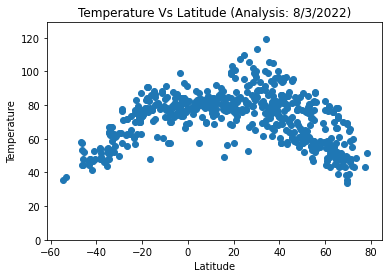

<Figure size 432x288 with 0 Axes>

In [11]:
# scatter plot of temp vs latitude
plt.scatter(cities_df["Latitude"], cities_df["Temp"])
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Temperature Vs Latitude (Analysis: 8/3/2022)")
plt.ylim(0, max(temp)+10)
plt.show()
plt.savefig("output_images/all_temperature_lat.png")

The above plot demonstrates the maximum tempartures of the Cities generated in the random Citipy command against the Latitude of each specific city. The temparture and latitude were determined in the for loop above.

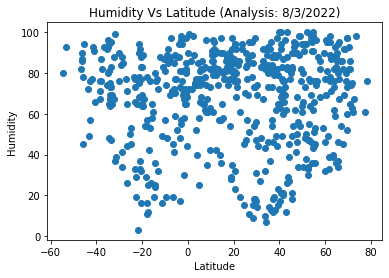

<Figure size 432x288 with 0 Axes>

In [12]:
plt.scatter(cities_df["Latitude"], cities_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Humidity Vs Latitude (Analysis: 8/3/2022)")
plt.show()
plt.savefig("output_images/all_humidity_lat.png")

The above plot demonstrates the humidity of the Cities generated in the random Citipy command against the Latitude of each specific city. The humidity and latitude were determined in the for loop above.

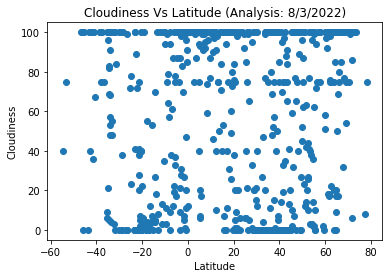

<Figure size 432x288 with 0 Axes>

In [13]:
plt.scatter(cities_df["Latitude"], cities_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Cloudiness Vs Latitude (Analysis: 8/3/2022)")
plt.show()
plt.savefig("output_images/all_cloudiness_lat.png")

The above plot demonstrates the cloudiness of the Cities generated in the random Citipy command against the Latitude of each specific city. The temparture and cloudiness were determined in the for loop above.

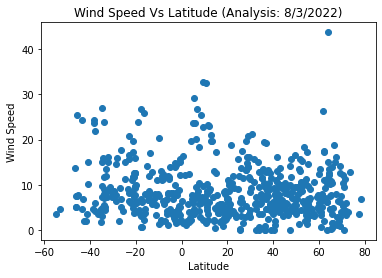

<Figure size 432x288 with 0 Axes>

In [14]:
plt.scatter(cities_df["Latitude"], cities_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Wind Speed Vs Latitude (Analysis: 8/3/2022)")
plt.show()
plt.savefig("output_images/all_wind_speed_lat.png")

The above plot demonstrates the wind speed of the Cities generated in the random Citipy command against the Latitude of each specific city. The wind speed and latitude were determined in the for loop above.

## Scatter Plots and Linear Regression for Hemisphere weather features vs Latitude

In [15]:
# generate northern hempisphere DF for plotting purposes
north_hemi_cities_df = cities_df.loc[cities_df["Latitude"] > 0, :]
north_hemi_cities_df

,City #,City,Temp,Latitude,Longitude,Humidity,Cloudiness,Wind Speed,Country,Date
6,7,dikson,48.45,73.5069,80.5464,98,100,12.86,RU,1659618643
7,8,la asuncion,80.22,11.0333,-63.8628,79,100,10.13,VE,1659618643
9,10,albany,80.73,42.6001,-73.9662,69,35,3.87,US,1659618352
10,11,bethel,82.49,41.3712,-73.4140,76,0,6.91,US,1659618644
12,13,kapaa,77.32,22.0752,-159.3190,84,20,10.36,US,1659618645
...,...,...,...,...,...,...,...,...,...,...
575,576,acapulco,78.62,16.8634,-99.8901,83,40,5.75,MX,1659618807
576,577,danilovka,87.15,50.3557,44.1168,34,62,9.51,RU,1659618847
577,578,sulangan,79.47,11.1373,123.7228,86,100,8.03,PH,1659618847
578,579,holme,81.97,56.1138,10.1725,74,72,9.04,DK,1659618847


In [16]:
# generate southern hempisphere DF for plotting purposes
south_hemi_cities_df = cities_df.loc[cities_df["Latitude"] < 0, :]
south_hemi_cities_df

,City #,City,Temp,Latitude,Longitude,Humidity,Cloudiness,Wind Speed,Country,Date
0,1,castro,73.40,-24.7911,-50.0119,45,23,11.25,BR,1659618536
1,2,tuatapere,53.17,-46.1333,167.6833,87,100,7.52,NZ,1659618641
2,3,hermanus,63.81,-34.4187,19.2345,65,83,15.90,ZA,1659618641
3,4,saldanha,58.77,-33.0117,17.9442,65,48,11.86,ZA,1659618642
4,5,manokwari,77.14,-0.8667,134.0833,81,100,3.36,ID,1659618642
...,...,...,...,...,...,...,...,...,...,...
565,566,opuwo,84.36,-18.0607,13.8400,11,4,3.51,NA,1659618843
566,567,chicama,57.74,-7.8447,-79.1469,86,94,5.77,PE,1659618843
569,570,karibib,79.39,-21.9333,15.8333,3,0,8.41,NA,1659618844
572,573,imbituba,71.10,-28.2400,-48.6703,85,100,15.99,BR,1659618845


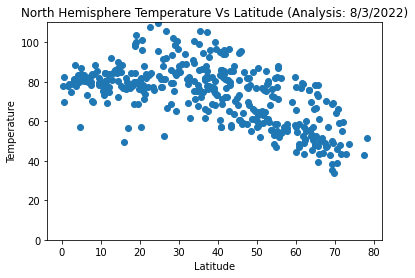

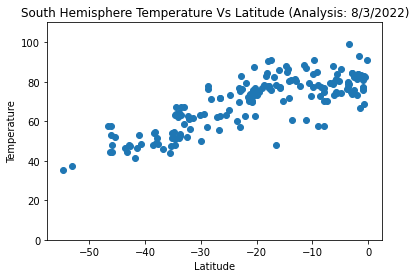

In [17]:
# scatter plot of temp vs latitude for northern hemisphere
# Note the regression lines will be plotted in cells below
plt.scatter(north_hemi_cities_df["Latitude"], north_hemi_cities_df["Temp"])
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("North Hemisphere Temperature Vs Latitude (Analysis: 8/3/2022)")
plt.ylim(0,110)
plt.show()

# scatter plot of temp vs latitude for southern hemisphere
# Note the regression lines will be plotted in cells below
plt.scatter(south_hemi_cities_df["Latitude"], south_hemi_cities_df["Temp"])
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("South Hemisphere Temperature Vs Latitude (Analysis: 8/3/2022)")
plt.ylim(0,110)
plt.show()

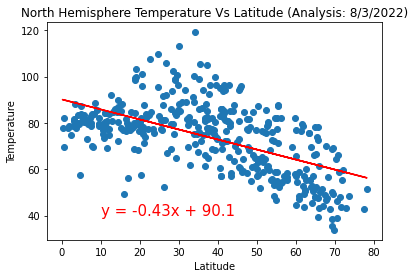

<Figure size 432x288 with 0 Axes>

In [18]:
#Latitude and temperature as x and y values
x_values = north_hemi_cities_df['Latitude'].astype('float')
y_values = north_hemi_cities_df['Temp'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot scatter plot
plt.scatter(x_values,y_values)
# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,40),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("North Hemisphere Temperature Vs Latitude (Analysis: 8/3/2022)")
plt.show()
plt.savefig("output_images/north_hemi_temperature_lat.png")

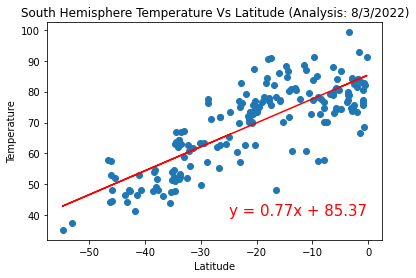

<Figure size 432x288 with 0 Axes>

In [19]:
#Latitude and temperature as x and y values
x_values = south_hemi_cities_df['Latitude'].astype('float')
y_values = south_hemi_cities_df['Temp'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot scatter plot
plt.scatter(x_values,y_values)
# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,40),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("South Hemisphere Temperature Vs Latitude (Analysis: 8/3/2022)")
plt.show()
plt.savefig("output_images/south_hemi_temperature_lat.png")

The above two plots demonstrate the maximum tempurature of the Cities in the northern hemisphere and southern hemisphere respectively generated in the random Citipy command against the Latitude of each specific city. The max temperature and latitude were determined in the for loop above.

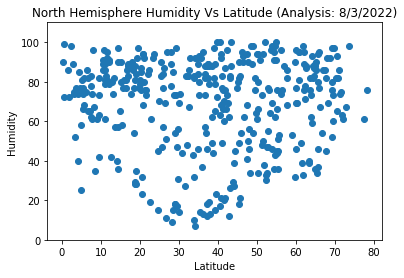

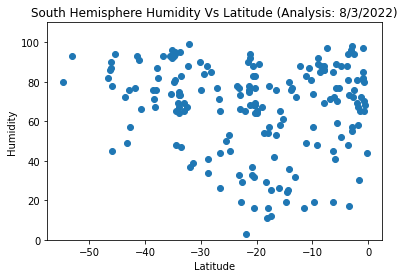

In [20]:
# scatter plot of humidity vs latitude for northern hemisphere
# Note the regression lines will be plotted in cells below
plt.scatter(north_hemi_cities_df["Latitude"], north_hemi_cities_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("North Hemisphere Humidity Vs Latitude (Analysis: 8/3/2022)")
plt.ylim(0,110)
plt.show()

# scatter plot of humidity vs latitude for southern hemisphere
# Note the regression lines will be plotted in cells below
plt.scatter(south_hemi_cities_df["Latitude"], south_hemi_cities_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("South Hemisphere Humidity Vs Latitude (Analysis: 8/3/2022)")
plt.ylim(0,110)
plt.show()

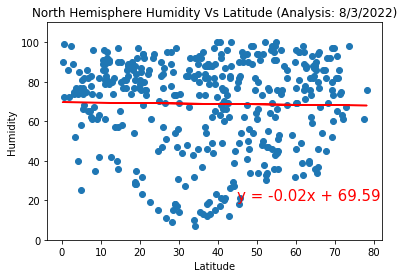

<Figure size 432x288 with 0 Axes>

In [21]:
#Latitude and humidity as x and y values
x_values = north_hemi_cities_df['Latitude'].astype('float')
y_values = north_hemi_cities_df['Humidity'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot scatter plot
plt.scatter(x_values,y_values)
# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,20),fontsize=15,color="red")
plt.ylim(0,110)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("North Hemisphere Humidity Vs Latitude (Analysis: 8/3/2022)")
plt.show()
plt.savefig("output_images/north_hemi_humidity_lat.png")

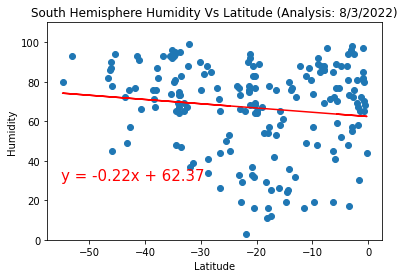

<Figure size 432x288 with 0 Axes>

In [22]:
#Latitude and humidity as x and y values
x_values = south_hemi_cities_df['Latitude'].astype('float')
y_values = south_hemi_cities_df['Humidity'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot scatter plot
plt.scatter(x_values,y_values)
# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,30),fontsize=15,color="red")
plt.ylim(0,110)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("South Hemisphere Humidity Vs Latitude (Analysis: 8/3/2022)")
plt.show()
plt.savefig("output_images/south_hemi_humidity_lat.png")

The above two plots demonstrate the humidity of the Cities in the northern hemisphere and southern hemisphere respectively generated in the random Citipy command against the Latitude of each specific city. The max humidity and latitude were determined in the for loop above.

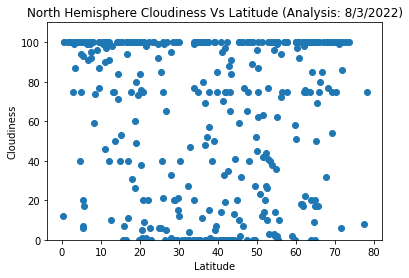

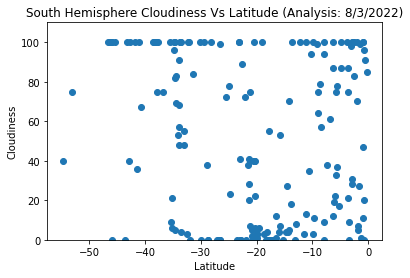

In [23]:
# scatter plot of cloudiness vs latitude for northern hemisphere
# Note the regression lines will be plotted in cells below
plt.scatter(north_hemi_cities_df["Latitude"], north_hemi_cities_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("North Hemisphere Cloudiness Vs Latitude (Analysis: 8/3/2022)")
plt.ylim(0,110)
plt.show()

# scatter plot of cloudiness vs latitude for southern hemisphere
# Note the regression lines will be plotted in cells below
plt.scatter(south_hemi_cities_df["Latitude"], south_hemi_cities_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("South Hemisphere Cloudiness Vs Latitude (Analysis: 8/3/2022)")
plt.ylim(0,110)
plt.show()

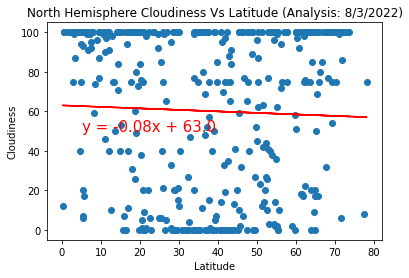

<Figure size 432x288 with 0 Axes>

In [24]:
#Latitude and cloudiness as x and y values
x_values = north_hemi_cities_df['Latitude'].astype('float')
y_values = north_hemi_cities_df['Cloudiness'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot scatter plot
plt.scatter(x_values,y_values)
# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("North Hemisphere Cloudiness Vs Latitude (Analysis: 8/3/2022)")
plt.show()
plt.savefig("output_images/north_hemi_cloudiness_lat.png")

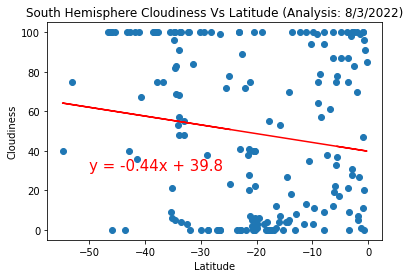

<Figure size 432x288 with 0 Axes>

In [25]:
#Latitude and cloudiness as x and y values
x_values = south_hemi_cities_df['Latitude'].astype('float')
y_values = south_hemi_cities_df['Cloudiness'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot scatter plot
plt.scatter(x_values,y_values)
# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("South Hemisphere Cloudiness Vs Latitude (Analysis: 8/3/2022)")
plt.show()
plt.savefig("output_images/south_hemi_cloudiness_lat.png")

The above two plots demonstrate the cloudiness of the Cities in the northern hemisphere and southern hemisphere respectively generated in the random Citipy command against the Latitude of each specific city. The max cloudiness and latitude were determined in the for loop above.

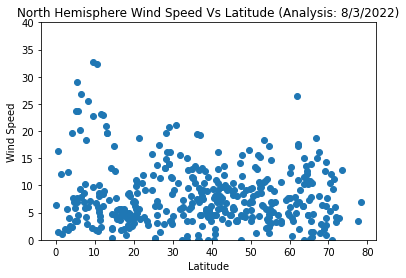

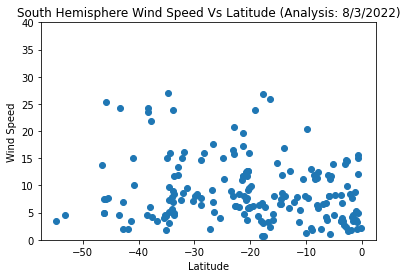

In [26]:
# scatter plot of wind speed vs latitude for northern hemisphere
# Note the regression lines will be plotted in cells below
plt.scatter(north_hemi_cities_df["Latitude"], north_hemi_cities_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("North Hemisphere Wind Speed Vs Latitude (Analysis: 8/3/2022)")
plt.ylim(0,40)
plt.show()

# scatter plot of wind speed vs latitude for southern hemisphere
# Note the regression lines will be plotted in cells below
plt.scatter(south_hemi_cities_df["Latitude"], south_hemi_cities_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("South Hemisphere Wind Speed Vs Latitude (Analysis: 8/3/2022)")
plt.ylim(0,40)
plt.show()

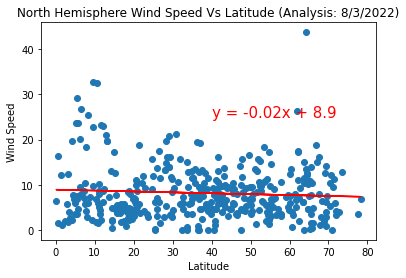

<Figure size 432x288 with 0 Axes>

In [27]:
#Latitude and wind speed as x and y values
x_values = north_hemi_cities_df['Latitude'].astype('float')
y_values = north_hemi_cities_df['Wind Speed'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot scatter plot
plt.scatter(x_values,y_values)
# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,25),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("North Hemisphere Wind Speed Vs Latitude (Analysis: 8/3/2022)")
plt.show()
plt.savefig("output_images/north_hemi_wind_speed_lat.png")

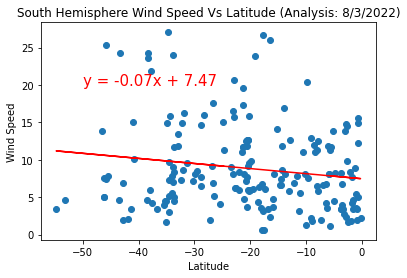

<Figure size 432x288 with 0 Axes>

In [28]:
#Latitude and wind speed as x and y values
x_values = south_hemi_cities_df['Latitude'].astype('float')
y_values = south_hemi_cities_df['Wind Speed'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot scatter plot
plt.scatter(x_values,y_values)
# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("South Hemisphere Wind Speed Vs Latitude (Analysis: 8/3/2022)")
plt.show()
plt.savefig("output_images/south_hemi_wind_speed_lat.png")

The above two plots demonstrate the wind speed of the Cities in the northern hemisphere and southern hemisphere respectively generated in the random Citipy command against the Latitude of each specific city. The max wind speed and latitude were determined in the for loop above.